In [2]:
"""
This model is discussed at https://lethain.com/api-deprecation-model/

For running this bookbook, see installation instructions at https://github.com/lethain/eng-strategy-models
"""

'\nThis model is discussed at https://lethain.com/api-deprecation-model/\n\nFor running this bookbook, see installation instructions at https://github.com/lethain/eng-strategy-models\n'

In [40]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def as_html(model, results):
    rendered = model.render_html(results)    
    return HTML(rendered)

def results_for_spec(spec, rounds):
    model = parse(spec)
    results = model.run(rounds=rounds)
    return model, results


def chart(title, xlabel, ylabel, keys, named_results, loc='best'):
    named_lines = {}
    for name, results in named_results.items():
        for key in keys:
            line_name = key
            if name:
                line_name = name + " " + line_name            
            named_lines[line_name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend(loc=loc)
        return ax


def multi_result_chart(title, xlabel, ylabel, key, named_results):
    named_lines = {}
    for name, results in named_results.items():
        named_lines[name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


In [45]:
spec = """
# User Acquisition Flow
[PotentialCustomers] > EngagedCustomers @ 100
# Initial Integration Flow
EngagedCustomers > IntegratedCustomers @ Leak(0.5)
# Baseline Churn Flow
IntegratedCustomers > ChurnedCustomers @ Leak(0.1)
# Experience Deprecation Flow
IntegratedCustomers > DeprecationImpactedCustomers @ Leak(0.5)
# Reintegrated Flow
DeprecationImpactedCustomers > IntegratedCustomers @ Leak(0.9)
# Deprecation-Influenced Churn
DeprecationImpactedCustomers  > ChurnedCustomers @ Leak(0.1)
"""
model1, results1 = results_for_spec(spec, 100)

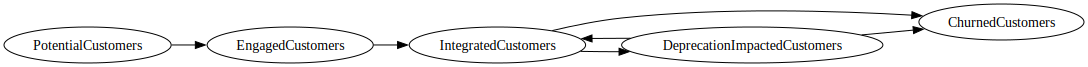

In [46]:
as_dot(model1)

<Axes: title={'center': 'Customer Integration & Churn Over Time'}, xlabel='Rounds', ylabel='Size of Stock'>

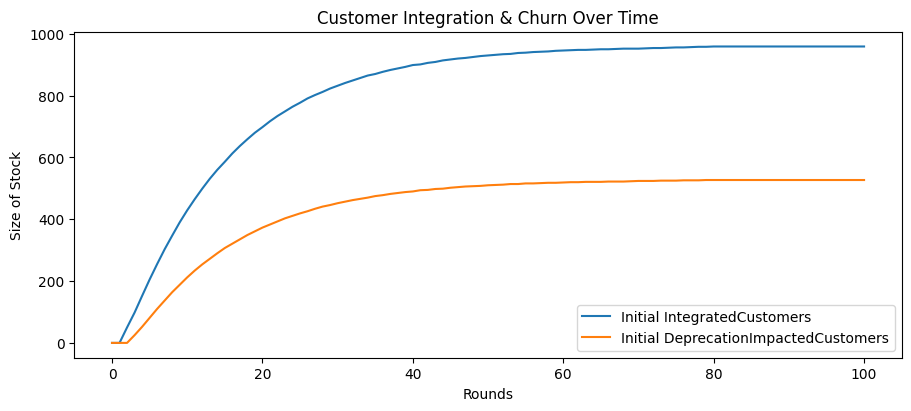

In [47]:
title = 'Customer Integration & Churn Over Time'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['IntegratedCustomers', 'DeprecationImpactedCustomers']

combined1 = {'Initial': results1 }
chart(title, x_axis, y_axis, cols, combined1)

In [43]:
spec2 = """
# User Acquisition Flow
[PotentialCustomers] > EngagedCustomers @ 100
# Initial Integration Flow
EngagedCustomers > IntegratedCustomers @ Leak(0.5)
# Baseline Churn Flow
IntegratedCustomers > ChurnedCustomers @ Leak(0.1)
# Experience Deprecation Flow
IntegratedCustomers > DeprecationImpactedCustomers @ Leak(0.1)
# Reintegrated Flow
DeprecationImpactedCustomers > IntegratedCustomers @ Leak(0.9)
# Deprecation-Influenced Churn
DeprecationImpactedCustomers  > ChurnedCustomers @ Leak(0.1)
"""
model2, results2 = results_for_spec(spec2, 100)

<Axes: title={'center': 'Customer Integration & Churn Over Time'}, xlabel='Rounds', ylabel='Size of Stock'>

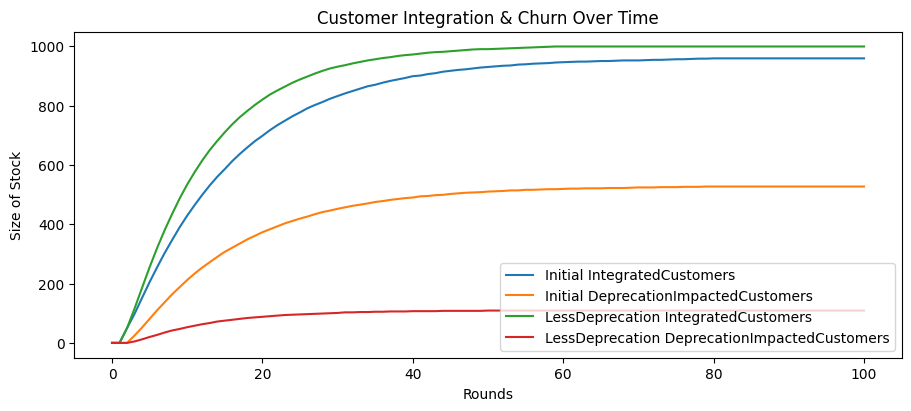

In [48]:
title = 'Customer Integration & Churn Over Time'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['IntegratedCustomers', 'DeprecationImpactedCustomers']

combined1 = {'Initial': results1, 'LessDeprecation': results2 }
chart(title, x_axis, y_axis, cols, combined1, loc='lower right')

In [49]:
spec3 = """
# User Acquisition Flow
[PotentialCustomers] > EngagedCustomers @ 100
# Initial Integration Flow
EngagedCustomers > IntegratedCustomers @ Leak(0.5)
# Baseline Churn Flow
IntegratedCustomers > ChurnedCustomers @ Leak(0.0)
# Experience Deprecation Flow
IntegratedCustomers > DeprecationImpactedCustomers @ Leak(0.5)
# Reintegrated Flow
DeprecationImpactedCustomers > IntegratedCustomers @ Leak(0.9)
# Deprecation-Influenced Churn
DeprecationImpactedCustomers  > ChurnedCustomers @ Leak(0.1)
"""
model3, results3 = results_for_spec(spec3, 100)

<Axes: title={'center': 'Customer Integration & Churn Over Time'}, xlabel='Rounds', ylabel='Size of Stock'>

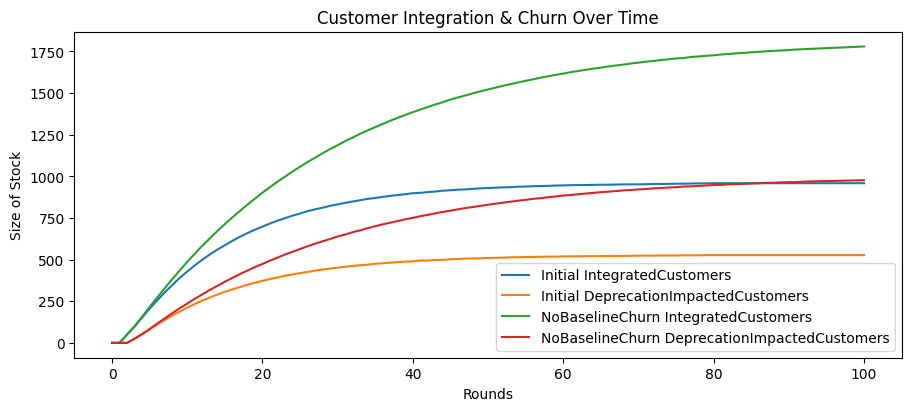

In [50]:
title = 'Customer Integration & Churn Over Time'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['IntegratedCustomers', 'DeprecationImpactedCustomers']

combined1 = {'Initial': results1, 'NoBaselineChurn': results3 }
chart(title, x_axis, y_axis, cols, combined1, loc='lower right')

In [51]:
spec4 = """
# User Acquisition Flow
[PotentialCustomers] > EngagedCustomers @ 100
# Initial Integration Flow
EngagedCustomers > IntegratedCustomers @ Leak(0.5)
# Baseline Churn Flow
IntegratedCustomers > ChurnedCustomers @ Leak(0.0)
# Experience Deprecation Flow
IntegratedCustomers > DeprecationImpactedCustomers @ Leak(0.1)
# Reintegrated Flow
DeprecationImpactedCustomers > IntegratedCustomers @ Leak(0.9)
# Deprecation-Influenced Churn
DeprecationImpactedCustomers  > ChurnedCustomers @ Leak(0.1)
"""
model4, results4 = results_for_spec(spec4, 100)

<Axes: title={'center': 'Customer Integration & Churn Over Time'}, xlabel='Rounds', ylabel='Size of Stock'>

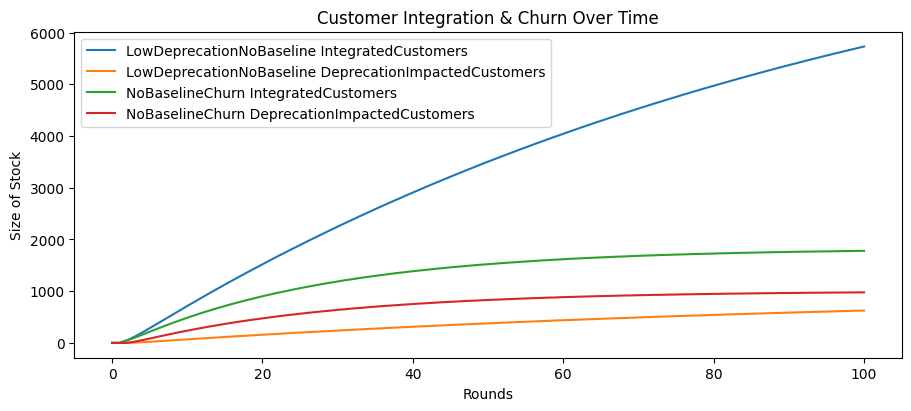

In [53]:
title = 'Customer Integration & Churn Over Time'
y_axis = 'Size of Stock'
x_axis = 'Rounds'
cols = ['IntegratedCustomers', 'DeprecationImpactedCustomers']

combined1 = {'LowDeprecationNoBaseline': results4, 'NoBaselineChurn': results3 }
chart(title, x_axis, y_axis, cols, combined1, loc='upper left')